# Genet Sebehat
## MSDS692 Practicum II - Credit Card Approval Prediction Project

### Introduction
My goal in investigating the credit card approval prediction data set is to identify and understand credit card approval requirements relating to customers’ previous financial history.

### Methods and Results

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
# Building model using all features
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
#from sklearn.preprocessing import Robustscaler

In [2]:
# Load the data from desktop
ceridt_card_apps=pd.read_csv('C:/Users/owner/Desktop/Regis University/MSDS696/Data Set/application_record.csv')

In [3]:
# head function to display #the first few rows
ceridt_card_apps.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1


In [4]:
# Print summary statistics
print(ceridt_card_apps.describe())

print("\n")

# Print DataFrame information
ceridt_card_apps_info = ceridt_card_apps.info()
print(ceridt_card_apps_info)

print("\n")

# Inspect missing values in the dataset

ceridt_card_apps.tail(20)

                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  4.385570e+05  438557.000000      4.385570e+05  438557.000000   
mean   6.022176e+06       0.427390      1.875243e+05  -15997.904649   
std    5.716370e+05       0.724882      1.100869e+05    4185.030007   
min    5.008804e+06       0.000000      2.610000e+04  -25201.000000   
25%    5.609375e+06       0.000000      1.215000e+05  -19483.000000   
50%    6.047745e+06       0.000000      1.607805e+05  -15630.000000   
75%    6.456971e+06       1.000000      2.250000e+05  -12514.000000   
max    7.999952e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  438557.000000    438557.0    438557.000000  438557.000000   
mean    60563.675328         1.0         0.206133       0.287771   
std    138767.799647         0.0         0.404527       0.452724   
min    -17531.000000         1.0         0.000000       0.000000   
25%     -3103.000000

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
438537,6837450,M,N,Y,1,135000.0,Working,Secondary / secondary special,Separated,House / apartment,-12972,-179,1,0,0,0,Security staff,2
438538,6837452,M,N,N,1,135000.0,Working,Secondary / secondary special,Separated,House / apartment,-12972,-179,1,0,0,0,Security staff,2
438539,6837454,M,Y,Y,1,162000.0,State servant,Secondary / secondary special,Married,House / apartment,-10890,-2675,1,0,0,0,Core staff,3
438540,6837493,M,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22845,365243,1,0,1,0,NaN,2
438541,6837707,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,-13510,-2309,1,1,0,0,Laborers,2
438542,6837905,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,NaN,3
438543,6837906,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,NaN,3
438544,6838056,F,N,Y,0,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-18997,-483,1,0,0,0,NaN,2
438545,6839651,F,N,Y,3,99000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-18832,365243,1,0,0,0,NaN,1
438546,6839890,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22551,365243,1,0,0,0,NaN,1


### Data wrangling

The process that is cleaning the data by either removing rows with missing values or inputting the missing values. 

In [5]:
# Inspect missing values in the dataset
# Replace the ' 's with NaN
ceridt_card_apps = ceridt_card_apps.replace(' ', np.NaN)
# Inspect the missing values again
ceridt_card_apps.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1


In [6]:
# Get the row and column count of the dataframe OR Shape of the data
print("shape of the data:", ceridt_card_apps.shape)

shape of the data: (438557, 18)


In [7]:
# Using sum() to count the number of NaN values in a DataFrame column. 
ceridt_card_apps.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [8]:
# check data type of the dataframe
ceridt_card_apps.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS          int64
dtype: object

### Handling the missing values (part i)

In [9]:
# delete NaNs
cc_apps = ceridt_card_apps.dropna()

### Handling the missing values (part ii)

In [10]:
# Get the row and column count of the df
cc_apps.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [11]:
# Shape of the data
print("shape of the data:", cc_apps.shape)

shape of the data: (304354, 18)


### Handling the missing values (part iii)

In [12]:
# Count the number of NaNs in the dataset and print the counts to verify.
print(cc_apps.isnull().values.sum())

0


### Data preprocessing

Data Preprocessing refers to the steps applied to make data more suitable for data mining. The steps used for Data Preprocessing usually fall into two categories:
1.	selecting data objects and attributes for the analysis.
2.	creating/changing the attributes


#### Data preprocessing part I

In [13]:
cc_apps.head(6)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2


In [14]:
# Shape of the data
print("shape of the data:", cc_apps.shape)

shape of the data: (304354, 18)


#### Loading clean data

In [15]:
# Load the data from desktop
cc_appsv1=pd.read_csv('C:/Users/owner/Desktop/Regis University/MSDS696/Data Set/application_record v1.csv')

In [16]:
cc_appsv1.shape

(304354, 20)

#### Data preprocessing part I

In [17]:
# deleting columns for analysis purpose
cc_appsv1 = cc_appsv1.drop(["DAYS_BIRTH","DAYS_EMPLOYED"], axis=1)

In [18]:
# Shape of the data
print("shape of the data:", cc_appsv1.shape)

shape of the data: (304354, 18)


In [19]:
cc_appsv1.head(6)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,HIRE_DATE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.79,3.10,1,0,0,0,Security staff,2
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.32,8.35,1,0,1,1,Sales staff,1
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.32,8.35,1,0,1,1,Sales staff,1
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.32,8.35,1,0,1,1,Sales staff,1
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.32,8.35,1,0,1,1,Sales staff,1
5,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,46.19,2.11,1,1,1,1,Accountants,2


In [20]:
cc_appsv1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'AGE', 'HIRE_DATE',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [21]:
# Checking NaN values if there is any then data will be sanitized 
for column in cc_appsv1:
    if cc_appsv1[column].isnull().values.any():
        print ("NaN value/s detected in ")+ column
    else:
        print ("{} is doesn't have null values".format(column))

ID is doesn't have null values
CODE_GENDER is doesn't have null values
FLAG_OWN_CAR is doesn't have null values
FLAG_OWN_REALTY is doesn't have null values
CNT_CHILDREN is doesn't have null values
AMT_INCOME_TOTAL is doesn't have null values
NAME_INCOME_TYPE is doesn't have null values
NAME_EDUCATION_TYPE is doesn't have null values
NAME_FAMILY_STATUS is doesn't have null values
NAME_HOUSING_TYPE is doesn't have null values
AGE is doesn't have null values
HIRE_DATE is doesn't have null values
FLAG_MOBIL is doesn't have null values
FLAG_WORK_PHONE is doesn't have null values
FLAG_PHONE is doesn't have null values
FLAG_EMAIL is doesn't have null values
OCCUPATION_TYPE is doesn't have null values
CNT_FAM_MEMBERS is doesn't have null values


#### Descriptive Statistics
A descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.

In [22]:
# summary statistics
print(cc_appsv1.describe())

                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL            AGE  \
count  3.043540e+05  304354.000000      3.043540e+05  304354.000000   
mean   6.022984e+06       0.510977      1.948680e+05      40.538873   
std    5.698275e+05       0.765500      1.169721e+05       9.547486   
min    5.008806e+06       0.000000      2.700000e+04      20.500000   
25%    5.617726e+06       0.000000      1.350000e+05      32.700000   
50%    6.047822e+06       0.000000      1.800000e+05      39.930000   
75%    6.449036e+06       1.000000      2.250000e+05      47.750000   
max    7.999952e+06      19.000000      6.750000e+06      67.820000   

           HIRE_DATE  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  304354.000000    304354.0    304354.000000  304354.000000   
mean        7.178466         1.0         0.248152       0.285559   
std         6.571522         0.0         0.431941       0.451681   
min         0.030000         1.0         0.000000       0.000000   
25%         2.520000

In [23]:
np.round(cc_appsv1.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
ID,304354.0,6022984.18,569827.53,5008806.00,7999952.00
CNT_CHILDREN,304354.0,0.51,0.77,0.00,19.00
AMT_INCOME_TOTAL,304354.0,194867.98,116972.13,27000.00,6750000.00
AGE,304354.0,40.54,9.55,20.50,67.82
HIRE_DATE,304354.0,7.18,6.57,0.03,48.00
FLAG_MOBIL,304354.0,1.00,0.00,1.00,1.00
FLAG_WORK_PHONE,304354.0,0.25,0.43,0.00,1.00
FLAG_PHONE,304354.0,0.29,0.45,0.00,1.00
FLAG_EMAIL,304354.0,0.12,0.32,0.00,1.00
CNT_FAM_MEMBERS,304354.0,2.30,0.93,1.00,20.00


In [24]:
# Alternative way of writing 
np.round(cc_appsv1.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
ID,304354.0,6022984.18,569827.53,5008806.00,5617726.25,6047822.50,6449035.75,7999952.00
CNT_CHILDREN,304354.0,0.51,0.77,0.00,0.00,0.00,1.00,19.00
AMT_INCOME_TOTAL,304354.0,194867.98,116972.13,27000.00,135000.00,180000.00,225000.00,6750000.00
AGE,304354.0,40.54,9.55,20.50,32.70,39.93,47.75,67.82
HIRE_DATE,304354.0,7.18,6.57,0.03,2.52,5.25,9.60,48.00
FLAG_MOBIL,304354.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
FLAG_WORK_PHONE,304354.0,0.25,0.43,0.00,0.00,0.00,0.00,1.00
FLAG_PHONE,304354.0,0.29,0.45,0.00,0.00,0.00,1.00,1.00
FLAG_EMAIL,304354.0,0.12,0.32,0.00,0.00,0.00,0.00,1.00
CNT_FAM_MEMBERS,304354.0,2.30,0.93,1.00,2.00,2.00,3.00,20.00


In [25]:
# Looking unique values
print(cc_appsv1.NAME_EDUCATION_TYPE.nunique())

5


In [26]:
# Get the unique values and their frequency of variable NAME_EDUCATION_TYPE
cc_appsv1['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    204792
Higher education                  85663
Incomplete higher                 11635
Lower secondary                    2039
Academic degree                     225
Name: NAME_EDUCATION_TYPE, dtype: int64

In [27]:
# Looking unique values
print(cc_appsv1.nunique())
# Looking the data
print(cc_appsv1.head())

ID                     304331
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               11
AMT_INCOME_TOTAL          645
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
AGE                      4313
HIRE_DATE                3326
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            12
dtype: int64
        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008806           M            Y               Y             0   
1  5008808           F            N               Y             0   
2  5008809           F            N               Y             0   
3  5008810           F            N               Y             0   
4  5008811           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_IN

### Use EDA to understand the data

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Typical graphical techniques used in EDA are: Box plot, Histogram, Pareto chart, Scatter plot, and Stem-and-leaf plot.

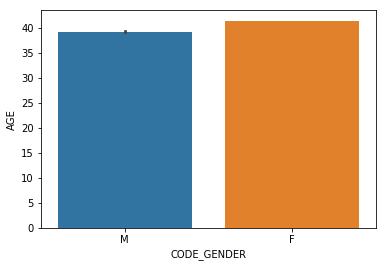

In [28]:
import seaborn as sns
sns.barplot(x="CODE_GENDER", y="AGE", data=cc_appsv1)

In [29]:
#(1 = graduate school; 2 = university; 3 = high school; 4 = others)
# preparing the vairable for the diagram
NAME_EDUCATION_TYPE = [1,2,3,4,5]
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [30]:
cc_appsv1 = cc_appsv1[(cc_appsv1['NAME_EDUCATION_TYPE'] == "Secondary / secondary special") | 
                      (cc_appsv1['NAME_EDUCATION_TYPE'] == "Higher education")|
                      (cc_appsv1['NAME_EDUCATION_TYPE'] == "Incomplete higher")|
                      (cc_appsv1['NAME_EDUCATION_TYPE'] == "Lower secondary")|
                      (cc_appsv1['NAME_EDUCATION_TYPE'] == "Academic degree")]

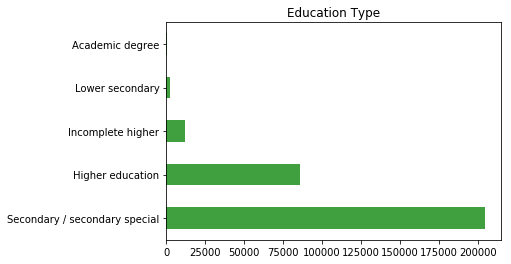

In [31]:
#import matplotlib palette
cc_appsv1['NAME_EDUCATION_TYPE'].value_counts().plot(kind= 'barh', color = 'green', title = 'Education Type', alpha = 0.75)
plt.show()

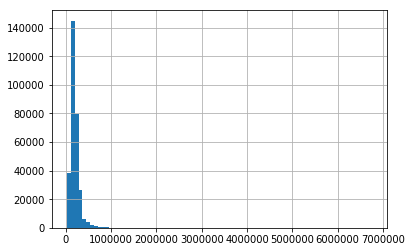

In [32]:
# Box Plot for understanding the distributions and to observe the outliers.

#%matplotlib inline

# Histogram of variable AMT_INCOME_TOTAL
cc_appsv1['AMT_INCOME_TOTAL'].hist(bins=80)

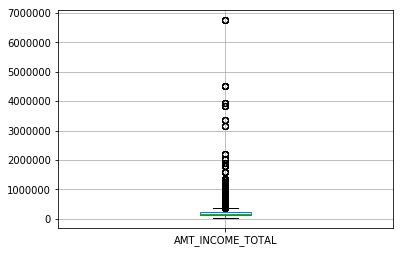

In [33]:
# Box Plot for variable AMT_INCOME_TOTAL of training data set
cc_appsv1.boxplot(column='AMT_INCOME_TOTAL')

##### The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the total amount of income disparity/variance among the credit card applicants.

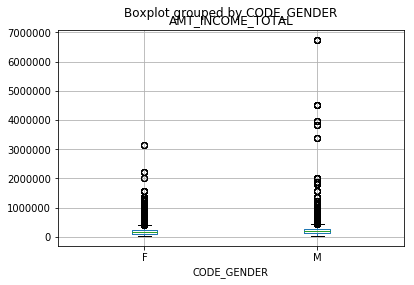

In [34]:
# Box Plot for variable AMT_INCOME_TOTAL by variable Education of training data set

cc_appsv1.boxplot(column='AMT_INCOME_TOTAL', by = 'CODE_GENDER')

##### As we can see the above boxplot that there is no substantial different between the mean income of female and male. But there are a higher number of male with very high incomes, which are appearing to be the outliers

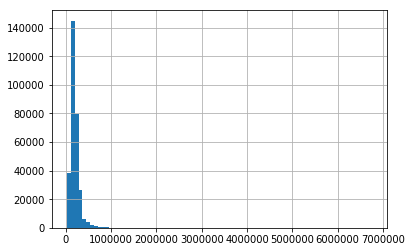

In [35]:
# Histogram of variable LoanAmount
#df['LoanAmount'].hist(bins=50)
cc_appsv1['AMT_INCOME_TOTAL'].hist(bins=80)

#### Understanding Distribution of Categorical Variables

#### Data description and distribution

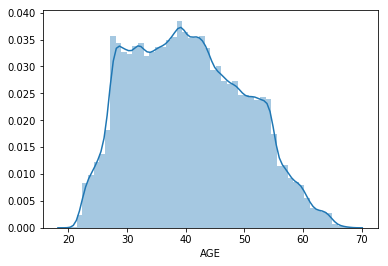

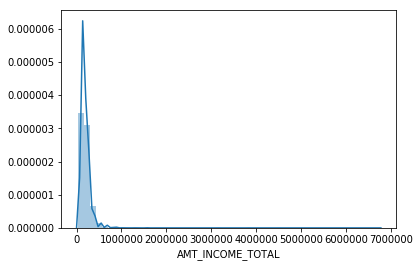

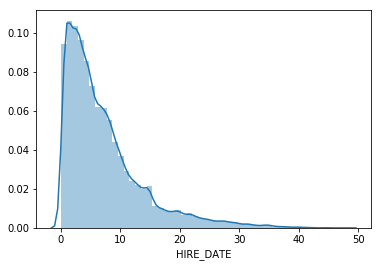

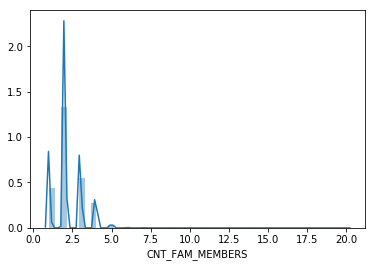

In [36]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(cc_appsv1['AGE'])
plotDistPlot(cc_appsv1['AMT_INCOME_TOTAL'])
plotDistPlot(cc_appsv1['HIRE_DATE'])
plotDistPlot(cc_appsv1['CNT_FAM_MEMBERS'])

#### Correlation
Variables within a dataset can be related for lots of reasons.

It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.

- Positive Correlation: both variables change in the same direction.
- Neutral Correlation: No relationship in the change of the variables.
- Negative Correlation: variables change in opposite directions.

In [37]:
# by looking at the column names, there might be multicollinearity issues here,
# so check the correlation matrix to confirm
cc_appsv1.corr()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,HIRE_DATE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
ID,1.000000,-0.005047,0.008412,0.008500,0.013691,NaN,-0.026664,-0.017986,0.032136,-0.001349
CNT_CHILDREN,-0.005047,1.000000,-0.021250,-0.261185,-0.072999,NaN,-0.021554,-0.044687,0.006455,0.899205
AMT_INCOME_TOTAL,0.008412,-0.021250,1.000000,0.063396,0.021934,NaN,-0.069955,0.006007,0.094285,-0.025201
AGE,0.008500,-0.261185,0.063396,1.000000,0.348427,NaN,-0.038465,0.045120,-0.060270,-0.209060
HIRE_DATE,0.013691,-0.072999,0.021934,0.348427,1.000000,NaN,0.011360,0.048456,-0.039629,-0.048704
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_WORK_PHONE,-0.026664,-0.021554,-0.069955,-0.038465,0.011360,NaN,1.000000,0.334779,-0.086798,-0.007718
FLAG_PHONE,-0.017986,-0.044687,0.006007,0.045120,0.048456,NaN,0.334779,1.000000,-0.002688,-0.030134
FLAG_EMAIL,0.032136,0.006455,0.094285,-0.060270,-0.039629,NaN,-0.086798,-0.002688,1.000000,0.000666
CNT_FAM_MEMBERS,-0.001349,0.899205,-0.025201,-0.209060,-0.048704,NaN,-0.007718,-0.030134,0.000666,1.000000


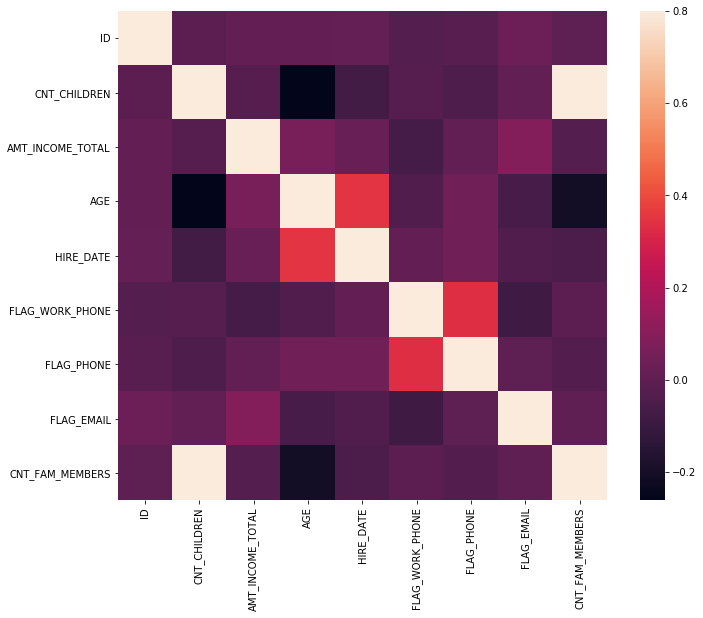

In [38]:
# deleting columns for analysis purpose
cc_appsv1 = cc_appsv1.drop(["FLAG_MOBIL"], axis=1)

#correlation matrix
corrmat = cc_appsv1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [40]:
#plt.figure(figsize=(14,12))
#sns.heatmap(cc_appsv1.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            #square=True,  linecolor='white', annot=True)
#plt.show()

In [ ]:
#scatterplot
sns.set()
cols = ['AGE', 'HIRE_DATE', 'AMT_INCOME_TOTAL',  'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
sns.pairplot(cc_appsv1[cols], height = 2.5)
plt.show();

#### Distribution of Categorical Variables

In [ ]:
# Loan approval rates in absolute numbers
FLAG_OWN_CAR  = cc_appsv1['FLAG_OWN_CAR'].value_counts()['Y']
print(FLAG_OWN_CAR)

In [ ]:
# Total income amount and income type
pd.crosstab(cc_appsv1 ['AMT_INCOME_TOTAL'], cc_appsv1 ['NAME_INCOME_TYPE'], margins=True)

In [ ]:
# Total income amount and Occupation type
pd.crosstab(cc_appsv1 ['AMT_INCOME_TOTAL'], cc_appsv1 ['OCCUPATION_TYPE'], margins=True)

#### Outliers of LoanAmount and Applicant Income

In [ ]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
#cc_appsv1['AMT_INCOME_TOTAL'] = cc_appsv1['NAME_INCOME_TYPE'] + df['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
cc_appsv1['AMT_INCOME_TOTAL'].hist(bins=20)

#### Data Preparation for Model Building
sklearn requires all inputs to be numeric, I need to convert all categorical variables into numeric by encoding the categories. Before that I will fill all the missing values in the dataset.

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Impute missing values for Gender
cc_appsv1['CODE_GENDER'].fillna(cc_appsv1['CODE_GENDER'].mode()[0],inplace=True)

# Impute missing values for Married
cc_appsv1['NAME_FAMILY_STATUS'].fillna(cc_appsv1['NAME_FAMILY_STATUS'].mode()[0],inplace=True)

# Impute missing values for flag own realty
cc_appsv1['FLAG_OWN_REALTY'].fillna(cc_appsv1['FLAG_OWN_REALTY'].mode()[0],inplace=True)

# Impute missing values for NAME_INCOME_TYPE
cc_appsv1['NAME_INCOME_TYPE'].fillna(cc_appsv1['NAME_INCOME_TYPE'].mode()[0],inplace=True)

# Impute missing values for NAME_EDUCATION_TYPE
cc_appsv1['NAME_EDUCATION_TYPE'].fillna(cc_appsv1['NAME_EDUCATION_TYPE'].mode()[0],inplace=True)

# Impute missing values for NAME_FAMILY_STATUS
cc_appsv1['NAME_FAMILY_STATUS'].fillna(cc_appsv1['NAME_FAMILY_STATUS'].mode()[0],inplace=True)

# Impute missing values for NAME_HOUSING_TYPE
cc_appsv1['NAME_HOUSING_TYPE'].fillna(cc_appsv1['NAME_HOUSING_TYPE'].mode()[0],inplace=True)

# Impute missing values for OCCUPATION_TYPE
cc_appsv1['OCCUPATION_TYPE'].fillna(cc_appsv1['OCCUPATION_TYPE'].mode()[0],inplace=True)


# Convert all non-numeric values to number
cat=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
     'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

for var in cat:
    le = preprocessing.LabelEncoder()
    cc_appsv1[var]=le.fit_transform(cc_appsv1[var].astype('str'))
cc_appsv1.dtypes

#### Generic Classification Function

In [ ]:
# Import models from scikit learn module:
from sklearn import metrics
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
#import sklearn_pandas

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

#### Model Building

In [ ]:
#Combining both train and test dataset

#Create a flag for Train and Test Data set
cc_appsv1['Type']='Train' 
test['Type']='Test'
#test = test['Type']
fullData = pd.concat([cc_appsv1,test], axis=0)

#Look at the available missing values in the dataset
fullData.isnull().sum()


In [ ]:
#Identify categorical and continuous variables
ID_col = ['ID']
target_col = ["AMT_INCOME_TOTAL"]
cat_cols = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
     'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

In [ ]:
#Imputing Missing values with mean for continuous variable
fullData['CNT_CHILDREN'].fillna(fullData['CNT_CHILDREN'].mean(), inplace=True)
fullData['AMT_INCOME_TOTAL'].fillna(fullData['AMT_INCOME_TOTAL'].mean(), inplace=True)
fullData['AGE'].fillna(fullData['AGE'].mean(), inplace=True)
fullData['HIRE_DATE'].fillna(fullData['HIRE_DATE'].mean(), inplace=True)
fullData['FLAG_MOBIL'].fillna(fullData['FLAG_MOBIL'].mean(), inplace=True)
fullData['FLAG_WORK_PHONE'].fillna(fullData['FLAG_WORK_PHONE'].mean(), inplace=True)
fullData['FLAG_PHONE'].fillna(fullData['FLAG_PHONE'].mean(), inplace=True)
fullData['FLAG_EMAIL'].fillna(fullData['FLAG_EMAIL'].mean(), inplace=True)
fullData['CNT_FAM_MEMBERS'].fillna(fullData['CNT_FAM_MEMBERS'].mean(), inplace=True)


#Imputing Missing values with mode for categorical variables
fullData['CODE_GENDER'].fillna(fullData['CODE_GENDER'].mode()[0], inplace=True)
fullData['FLAG_OWN_CAR'].fillna(fullData['FLAG_OWN_CAR'].mode()[0], inplace=True)
fullData['FLAG_OWN_REALTY'].fillna(fullData['FLAG_OWN_REALTY'].mode()[0], inplace=True)
fullData['NAME_INCOME_TYPE'].fillna(fullData['NAME_INCOME_TYPE'].mode()[0], inplace=True)
fullData['NAME_EDUCATION_TYPE'].fillna(fullData['NAME_EDUCATION_TYPE'].mode()[0], inplace=True)
fullData['NAME_FAMILY_STATUS'].fillna(fullData['NAME_FAMILY_STATUS'].mode()[0], inplace=True)
fullData['NAME_HOUSING_TYPE'].fillna(fullData['NAME_HOUSING_TYPE'].mode()[0], inplace=True)
fullData['OCCUPATION_TYPE'].fillna(fullData['OCCUPATION_TYPE'].mode()[0], inplace=True)

In [ ]:
#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified["AMT_INCOME_TOTAL"] = number.fit_transform(train_modified["AMT_INCOME_TOTAL"].astype('str'))

#### Logistic Regression Model
The chances of getting a loan will be higher for:

    . Applicants having a credit history (we observed this in exploration.)
    . Applicants with higher applicant and co-applicant incomes
    . Applicants with higher education level
    . Properties in urban areas with high growth perspectives
    . So let’s make our model with ‘Employment status’, 'Education' & 'Gender'

In [ ]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['DAYS_EMPLOYED','NAME_EDUCATION_TYPE','CODE_GENDER']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["AMT_INCOME_TOTAL"].values

x_test=test_modified[list(predictors_Logistic)].values

In [ ]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

outcome_var = 'Loan_Status'

classification_model(model, df,predictors_Logistic,outcome_var)

test_modified.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'])